In [40]:
import sys, os
sys.path.append(os.path.abspath(".."))

import torch
from torch import nn
from src.data import get_loaders
from src.models import MLP
from src.train import train_one_epoch, evaluate, get_optimizer

In [41]:
from pathlib import Path
import time, json

run_dir = Path.cwd().parent / "results" / time.strftime("run_%Y-%m-%d_%H-%M-%S")
run_dir.mkdir(parents=True, exist_ok=True)

config = {
    "model": "MLP(784->64->10)",
    "optimizer": "Adam",
    "lr": 1e-3,
    "epochs": epochs,
    "batch_size": 64,
}
(run_dir / "config.json").write_text(json.dumps(config, indent=2))
print("Saving artifacts to:", run_dir)


Saving artifacts to: /home/aac/Dev/projects/mnist-classifier/results/run_2025-10-16_11-44-59


In [42]:
from src.train import train_one_epoch, evaluate

train_losses, test_accs = [], []
model = MLP(hidden_size=64, num_classes=10).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = get_optimizer("adam", model.parameters(), lr=1e-3)

for ep in range(1, epochs + 1):
    train_loss = train_one_epoch(model, train_loader, criterion, optimizer, device)
    metrics = evaluate(model, test_loader, device)
    train_losses.append(train_loss)
    test_accs.append(metrics["accuracy"])
    print(f"Epoch {ep}/{epochs} | loss={train_loss:.4f} | acc={metrics['accuracy']:.2f}%")

Epoch 1/8 | loss=0.5235 | acc=94.37%
Epoch 2/8 | loss=0.2739 | acc=95.37%
Epoch 3/8 | loss=0.2061 | acc=96.56%
Epoch 4/8 | loss=0.1740 | acc=97.07%
Epoch 5/8 | loss=0.1532 | acc=97.21%
Epoch 6/8 | loss=0.1429 | acc=97.48%
Epoch 7/8 | loss=0.1332 | acc=97.58%
Epoch 8/8 | loss=0.1277 | acc=97.43%


In [43]:
# save model weights
torch.save(model.state_dict(), run_dir / "model.pth")

# save metrics
metrics_payload = {
    "train_loss": train_losses,
    "test_accuracy": test_accs
}
(run_dir / "metrics.json").write_text(json.dumps(metrics_payload, indent=2))
print("Saved model.pth and metrics.json")

Saved model.pth and metrics.json


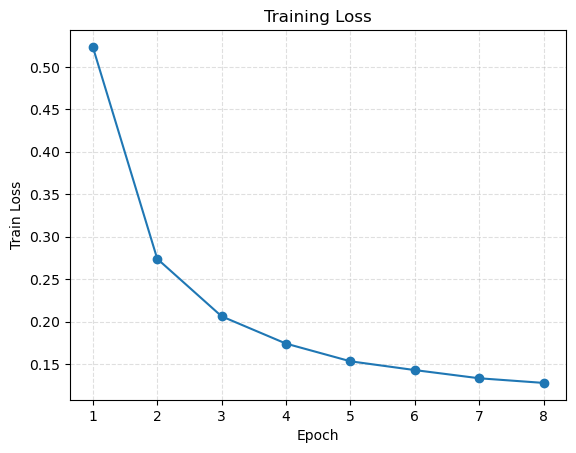

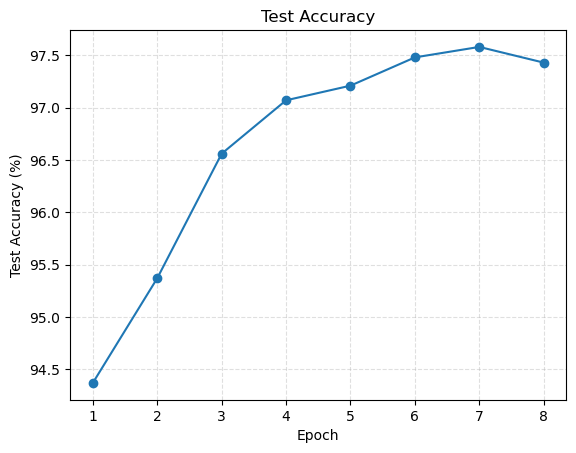

Saved loss_curve.png and accuracy_curve.png


In [44]:
import matplotlib.pyplot as plt

# Loss curve
plt.figure()
plt.plot(range(1, epochs+1), train_losses, marker='o')
plt.xlabel("Epoch"); plt.ylabel("Train Loss"); plt.title("Training Loss")
plt.grid(True, linestyle="--", alpha=0.4)
plt.savefig(run_dir / "loss_curve.png", dpi=150)
plt.show()

# Accuracy curve
plt.figure()
plt.plot(range(1, epochs+1), test_accs, marker='o')
plt.xlabel("Epoch"); plt.ylabel("Test Accuracy (%)"); plt.title("Test Accuracy")
plt.grid(True, linestyle="--", alpha=0.4)
plt.savefig(run_dir / "accuracy_curve.png", dpi=150)
plt.show()

print("Saved loss_curve.png and accuracy_curve.png")

In [45]:
from pathlib import Path
import time, json

# create a fresh run folder (do this before training)
run_dir = Path.cwd().parent / "results" / time.strftime("run_%Y-%m-%d_%H-%M-%S_cnn")
run_dir.mkdir(parents=True, exist_ok=True)

config = {
    "model": "SimpleCNN(1→32→64→FC100→10)",
    "optimizer": "AdamW",
    "lr": 1e-3,
    "epochs": 8,
    "batch_size": 128,
    "augment": True,
}
(run_dir / "config.json").write_text(json.dumps(config, indent=2))
print("Saving to:", run_dir)

Saving to: /home/aac/Dev/projects/mnist-classifier/results/run_2025-10-16_11-46-07_cnn


In [46]:
from src.models import SimpleCNN
from src.data import get_loaders
from src.train import train_one_epoch, evaluate, get_optimizer
from torch import nn
import torch


train_losses_cnn, test_accs_cnn = [], []

device = "cuda" if torch.cuda.is_available() else "cpu"
train_loader, test_loader = get_loaders(batch_size=128, augment=True)

model = SimpleCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = get_optimizer("adamw", model.parameters(), lr=1e-3)

epochs = 8
for ep in range(1, epochs+1):
    loss = train_one_epoch(model, train_loader, criterion, optimizer, device)
    acc = evaluate(model, test_loader, device)["accuracy"]
    train_losses_cnn.append(loss)
    test_accs_cnn.append(acc)
    print(f"[CNN] Epoch {ep}/{epochs} | loss={loss:.4f} | acc={acc:.2f}%")


[CNN] Epoch 1/8 | loss=0.2386 | acc=98.36%
[CNN] Epoch 2/8 | loss=0.0802 | acc=98.88%
[CNN] Epoch 3/8 | loss=0.0572 | acc=99.02%
[CNN] Epoch 4/8 | loss=0.0476 | acc=99.11%
[CNN] Epoch 5/8 | loss=0.0431 | acc=99.15%
[CNN] Epoch 6/8 | loss=0.0386 | acc=99.28%
[CNN] Epoch 7/8 | loss=0.0348 | acc=99.18%
[CNN] Epoch 8/8 | loss=0.0328 | acc=99.35%


In [47]:
import json, torch

# after training finishes:
torch.save(model.state_dict(), run_dir / "model_cnn.pth")

metrics_payload = {
    "train_loss": train_losses_cnn,
    "test_accuracy": test_accs_cnn
}
(run_dir / "metrics_cnn.json").write_text(json.dumps(metrics_payload, indent=2))
print("Saved model_cnn.pth and metrics_cnn.json")

Saved model_cnn.pth and metrics_cnn.json


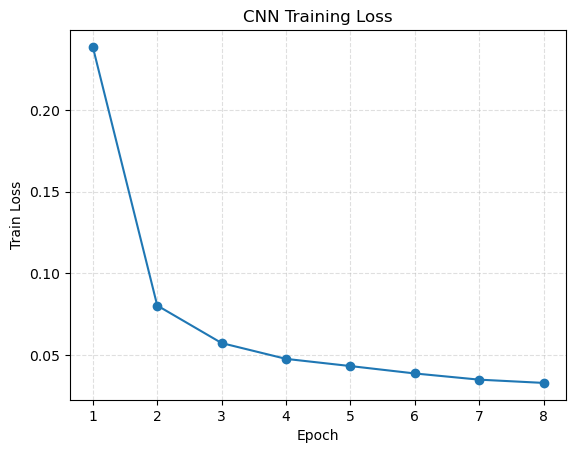

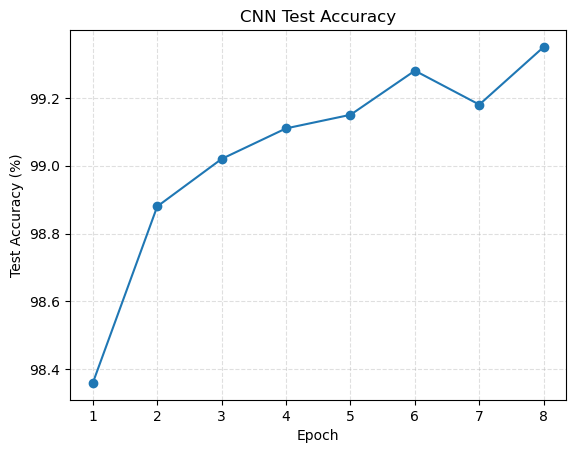

In [48]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(range(1, epochs+1), train_losses_cnn, marker='o')
plt.xlabel("Epoch"); plt.ylabel("Train Loss"); plt.title("CNN Training Loss")
plt.grid(True, linestyle="--", alpha=0.4)
plt.savefig(run_dir / "loss_curve_cnn.png", dpi=150)
plt.show()

plt.figure()
plt.plot(range(1, epochs+1), test_accs_cnn, marker='o')
plt.xlabel("Epoch"); plt.ylabel("Test Accuracy (%)"); plt.title("CNN Test Accuracy")
plt.grid(True, linestyle="--", alpha=0.4)
plt.savefig(run_dir / "accuracy_curve_cnn.png", dpi=150)
plt.show()